# Training RTT 0

In [171]:
import pandas

validate = pandas.read_csv("/App/output/train_0/validate.csv", header=None, na_values="")
validate = validate.sort_values(by=[0])
steps = validate[0].values
throughput = validate[1].values * 1000

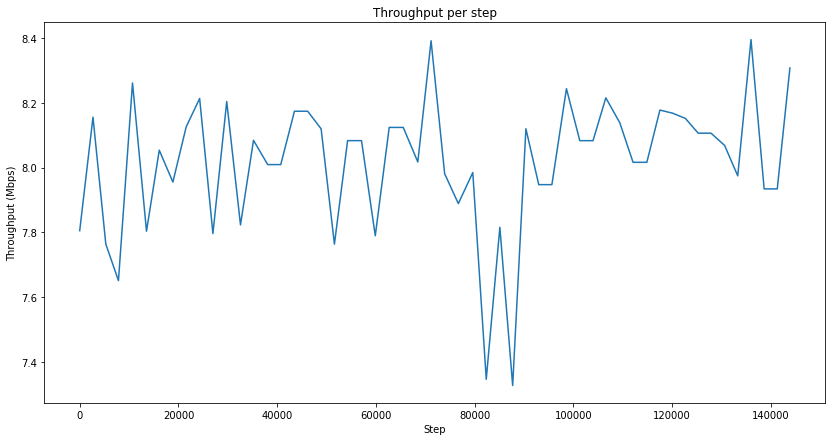

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(14, 7)

plt.plot(steps,2*1024*1024*8 / throughput)
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Step")
plt.title("Throughput per step")

In [180]:
validate.idxmin()
2*8*1024*1024/validate[1][16]/1000

8.39445377588995

In [181]:
validate[0][16]

135980

# No traffic

In [160]:
import pandas

single = pandas.read_csv("/App/output/results-mp-quic-single-sch-2018-12-19-14:51:17.585160")
srtt = pandas.read_csv("/App/output/results-mp-quic-rtt-sch-2018-12-19-12:01:05.330500")

In [161]:
average_srtt = (2*8*1024*1024/srtt).mean()
average_single = (2*8*1024*1024/single).mean()

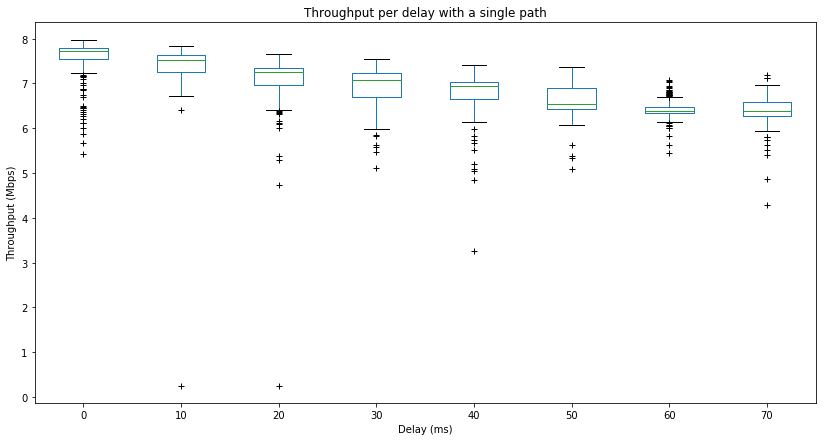

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(14, 7)

per_srtt = (2*8/srtt)
per_srtt.plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

In [141]:
rtt_0 = pandas.read_csv("/App/output/train_0/validate_135980.csv")
rtt_10 = pandas.read_csv("/App/output/train_10/validate_135980.csv")
rtt_20 = pandas.read_csv("/App/output/train_20/validate_135980.csv")
rtt_30 = pandas.read_csv("/App/output/train_30/validate_135980.csv")
rtt_40 = pandas.read_csv("/App/output/train_40/validate_135980.csv")
rtt_50 = pandas.read_csv("/App/output/train_50/validate_135980.csv")

In [142]:
rtt_0.columns=['0']
rtt_10.columns=['10']
rtt_20.columns=['20']
rtt_30.columns=['30']
rtt_40.columns=['40']
rtt_50.columns=['50']

In [143]:
agent = rtt_0.join([rtt_10,rtt_20,rtt_30,rtt_40,rtt_50])

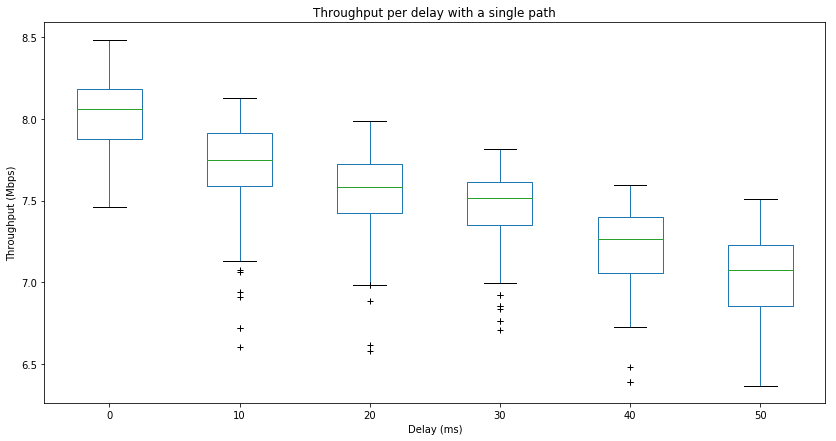

In [153]:
per_agent = ((2*8/agent/1000*1024*1024))
per_agent.plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

In [154]:
per_agent.mean()

0     8.024099
10    7.714199
20    7.541640
30    7.460743
40    7.220341
50    7.039463
dtype: float64

In [155]:
per_srtt.mean()

0     7.550040
10    7.385613
20    7.093001
30    6.936497
40    6.778092
50    6.607657
60    6.428650
70    6.394273
dtype: float64

In [165]:
per_agent.mean()/(2*single.mean())

0     1.029337
10    0.977179
20    0.961049
30    0.926850
40    0.882484
50    0.855760
60         NaN
70         NaN
dtype: float64

In [164]:
per_srtt.mean()/(2*single.mean())

0     0.968524
10    0.935556
20    0.903878
30    0.861722
40    0.828432
50    0.803267
60    0.764025
70    0.753331
dtype: float64

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

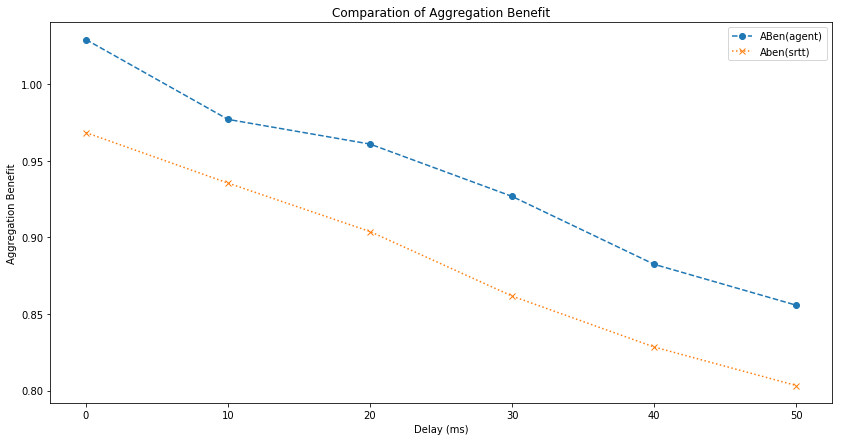

In [4]:
ab_agent = (1.029337, 0.977179, 0.961049, 0.926850, 0.882484, 0.855760)
ab_srtt = (0.968524, 0.935556, 0.903878, 0.861722, 0.828432, 0.803267)
delay = (0, 10, 20, 30, 40, 50)

figsize(14, 7)

plt.plot(delay, ab_agent, label="ABen(agent)", linestyle="--", marker='o')
plt.plot(delay, ab_srtt, label="Aben(srtt)", linestyle=":", marker='x')
plt.ylabel("Aggregation Benefit")
plt.xlabel("Delay (ms)")
plt.title("Comparation of Aggregation Benefit")
plt.legend()

In [201]:
(per_agent.mean()/(2*single.mean())-per_srtt.mean()/(2*single.mean()))

0     0.060813
10    0.041623
20    0.057171
30    0.065127
40    0.054053
50    0.052493
60         NaN
70         NaN
dtype: float64

In [200]:
(per_agent.mean()/(2*single.mean())-per_srtt.mean()/(2*single.mean())) / (per_srtt.mean()/(2*single.mean())) * 100

0     6.278882
10    4.448997
20    6.325089
30    7.557798
40    6.524682
50    6.534924
60         NaN
70         NaN
dtype: float64

# TCP

In [202]:
validate = pandas.read_csv("/App/output/train_0/validate_tcp.csv", header=None, na_values="")
validate = validate.sort_values(by=[0])
steps = validate[0].values
throughput = validate[1].values * 1000

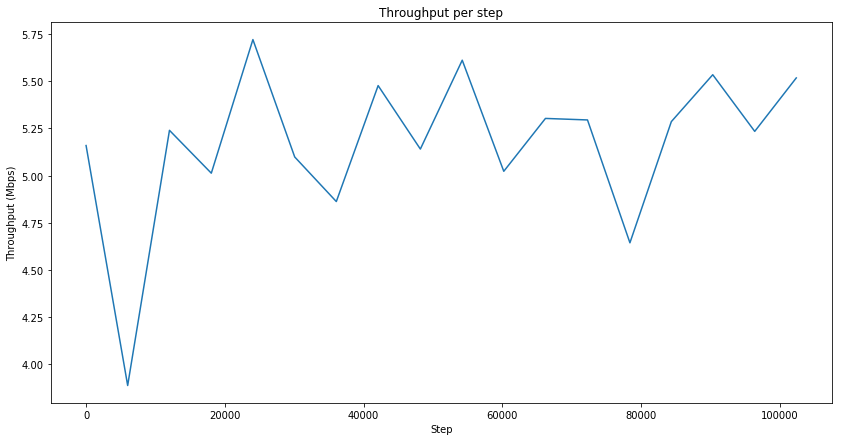

In [203]:
figsize(14, 7)

plt.plot(steps,2*1024*1024*8 / throughput)
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Step")
plt.title("Throughput per step")

In [204]:
validate.idxmin()

0    0
1    4
dtype: int64

In [206]:
2*8*1024*1024/validate[1][4] / 1000

5.720286750160736

In [207]:
validate[0][4]

24050

In [208]:
tcp_rtt_0 = pandas.read_csv("/App/output/train_0/validate_24050.csv")
tcp_rtt_10 = pandas.read_csv("/App/output/train_10/validate_24050.csv")
tcp_rtt_20 = pandas.read_csv("/App/output/train_20/validate_24050.csv")
tcp_rtt_30 = pandas.read_csv("/App/output/train_30/validate_24050.csv")
tcp_rtt_40 = pandas.read_csv("/App/output/train_40/validate_24050.csv")
tcp_rtt_50 = pandas.read_csv("/App/output/train_50/validate_24050.csv")

tcp_srtt_0 = pandas.read_csv("/App/output/train_0/validate_rtt.csv")
tcp_srtt_10 = pandas.read_csv("/App/output/train_10/validate_rtt.csv")
tcp_srtt_20 = pandas.read_csv("/App/output/train_20/validate_rtt.csv")
tcp_srtt_30 = pandas.read_csv("/App/output/train_30/validate_rtt.csv")
tcp_srtt_40 = pandas.read_csv("/App/output/train_40/validate_rtt.csv")
tcp_srtt_50 = pandas.read_csv("/App/output/train_50/validate_rtt.csv")

In [209]:
tcp_rtt_0.columns=['0']
tcp_rtt_10.columns=['10']
tcp_rtt_20.columns=['20']
tcp_rtt_30.columns=['30']
tcp_rtt_40.columns=['40']
tcp_rtt_50.columns=['50']
tcp_srtt_0.columns=['0']
tcp_srtt_10.columns=['10']
tcp_srtt_20.columns=['20']
tcp_srtt_30.columns=['30']
tcp_srtt_40.columns=['40']
tcp_srtt_50.columns=['50']

In [210]:
tcp_agent = tcp_rtt_0.join([tcp_rtt_10,tcp_rtt_20,tcp_rtt_30,tcp_rtt_40,tcp_rtt_50])

In [211]:
tcp_srtt = tcp_srtt_0.join([tcp_srtt_10,tcp_srtt_20,tcp_srtt_30,tcp_srtt_40,tcp_srtt_50])

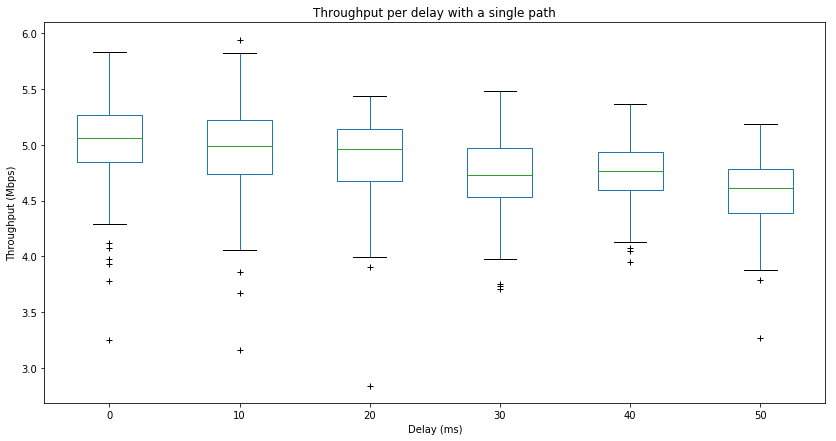

In [217]:
per_tcp_agent = ((2*8/tcp_agent/1000*1024*1024))
per_tcp_agent.plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

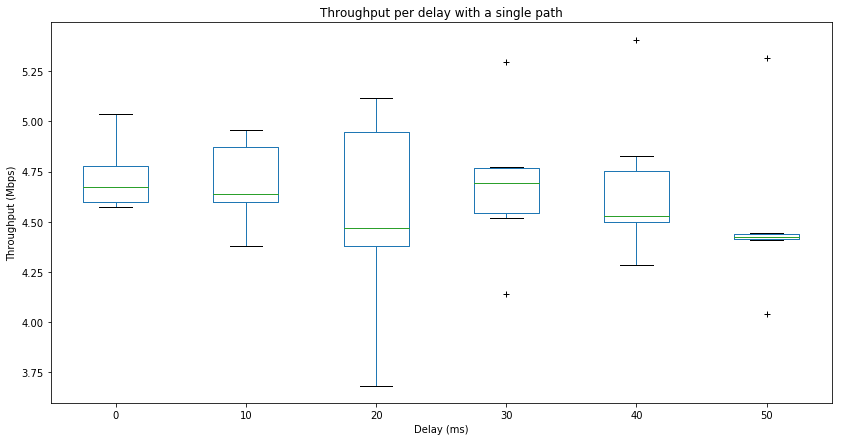

In [218]:
per_tcp_srtt = ((2*8/tcp_srtt/1000*1024*1024))
per_tcp_srtt.plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

In [219]:
per_tcp_agent.mean()

0     5.012454
10    4.965787
20    4.885420
30    4.724891
40    4.753878
50    4.583970
dtype: float64

In [220]:
per_tcp_srtt.mean()

0     4.723473
10    4.691994
20    4.531005
30    4.684505
40    4.678040
50    4.508904
dtype: float64

In [221]:
per_tcp_agent.mean() / (2*single.mean())

0     0.643001
10    0.629030
20    0.622561
30    0.586974
40    0.581028
50    0.557255
60         NaN
70         NaN
dtype: float64

In [222]:
per_tcp_srtt.mean() / (2*single.mean())

0     0.605930
10    0.594348
20    0.577396
30    0.581957
40    0.571759
50    0.548130
60         NaN
70         NaN
dtype: float64

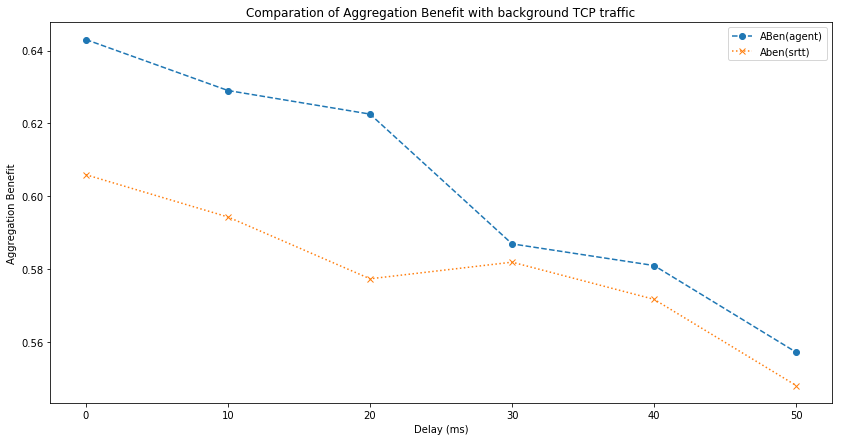

In [6]:
ab_tcp_agent = (0.643001, 0.629030, 0.622561, 0.586974, 0.581028, 0.557255)
ab_tcp_srtt = (0.605930, 0.594348, 0.577396, 0.581957, 0.571759, 0.548130)
delay = (0, 10, 20, 30, 40, 50)

figsize(14, 7)

plt.plot(delay, ab_tcp_agent, label="ABen(agent)", linestyle="--", marker='o')
plt.plot(delay, ab_tcp_srtt, label="Aben(srtt)", linestyle=":", marker='x')
plt.ylabel("Aggregation Benefit")
plt.xlabel("Delay (ms)")
plt.title("Comparation of Aggregation Benefit with background TCP traffic")
plt.legend()

In [225]:
per_tcp_agent.mean() / (2*single.mean()) - per_tcp_srtt.mean() / (2*single.mean())

0     0.037071
10    0.034682
20    0.045164
30    0.005017
40    0.009269
50    0.009125
60         NaN
70         NaN
dtype: float64

In [229]:
(per_tcp_agent.mean() / (2*single.mean()) - per_tcp_srtt.mean() / (2*single.mean())) / (per_tcp_srtt.mean() / (2*single.mean())) * 100

0     6.117990
10    5.835325
20    7.822012
30    0.862121
40    1.621157
50    1.664833
60         NaN
70         NaN
dtype: float64